In [34]:
!pip install qiskit
!pip install qiskit-aer
import qiskit as qk
import numpy as np
import random
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT
from qiskit.circuit.library.standard_gates import UGate

In [35]:
# 1a
a= 0
b=1
qc = QuantumCircuit(2)
# swaps states of qubits a and b
qc.swap(a,b)
qc.draw()

q_0: ─X─
      │ 
q_1: ─X─

Binary Number (abc) -> Incremented Binary Number
000 -> 1


<ipython-input-36-e7cdb461e661>:20: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj).result()


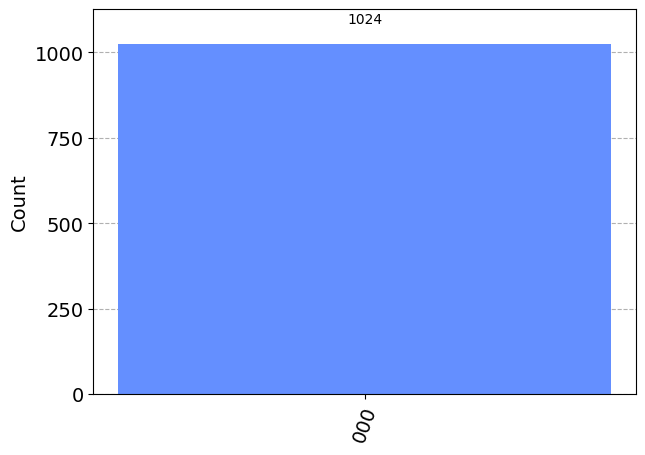

In [36]:
# 1b
# Create a quantum circuit with three qubits
qc = QuantumCircuit(3)

# Apply the increment gates
qc.cx(0, 1)
qc.cx(0, 2)

# Perform modular addition (controlled increments)
qc.ccx(1, 2, 0)
qc.cx(1, 2)

# Measure the qubits
qc.measure_all()

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
tqc = transpile(qc, simulator)
qobj = assemble(tqc)
result = simulator.run(qobj).result()
counts = result.get_counts(qc)

# Print the results
print("Binary Number (abc) -> Incremented Binary Number")
for binary_num, count in counts.items():
    print(f"{binary_num} -> {int(binary_num, 2)+1}")

# Plot the histogram
plot_histogram(counts)


In [ ]:
# 1c optional

<ipython-input-37-bd3aba1a7946>:20: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj).result()


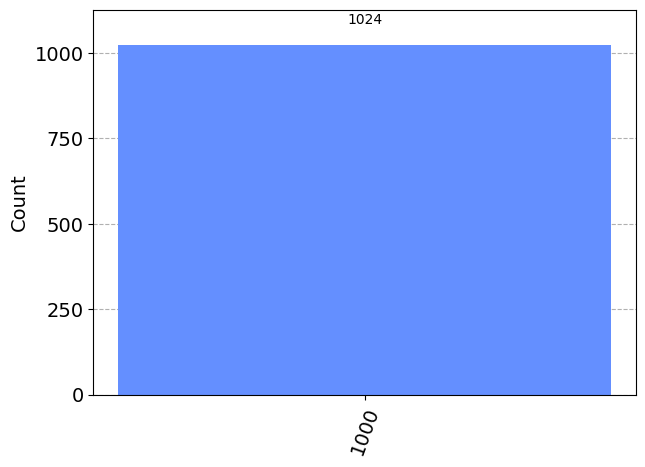

In [37]:
#1d
# Create a quantum circuit with 4 qubits
qc = qk.QuantumCircuit(4,4)

# Initialize the ancilla qubit to |1⟩
qc.x(3)

# Apply controlled-NOT (CNOT) gates to compute Hamming weight
qc.cx(0, 3)
qc.cx(1, 3)
qc.cx(2, 3)

# Measure the ancilla qubit
qc.measure(3,3)

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
tqc = transpile(qc, simulator)
qobj = assemble(tqc)
result = simulator.run(qobj).result()
counts = result.get_counts(qc)

# Plot the histogram
plot_histogram(counts)


<ipython-input-38-a6324529960e>:46: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj).result()


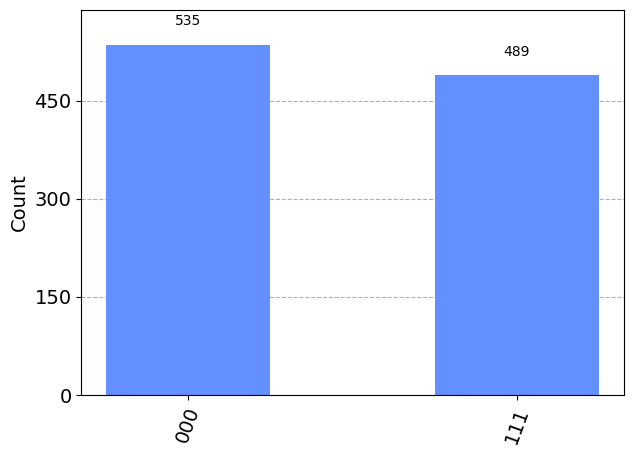

In [38]:
#2 bv
# Function to implement the Bernstein-Vazirani oracle for a given secret string
def bv_oracle(circuit, secret_string):
    n = len(secret_string)

    # Implement the oracle using controlled-NOT (CNOT) gates
    for qubit in range(n):
        if secret_string[qubit] == '1':
            circuit.cx(qubit, n)

# Function to create a quantum circuit for the Bernstein-Vazirani algorithm
def create_bv_circuit(secret_string):
    n = len(secret_string)

    # Create a quantum circuit with n+1 qubits: n qubits for input and 1 qubit for the output
    qc = QuantumCircuit(n+1, n)

    # Apply Hadamard gates to all qubits
    qc.h(range(n+1))

    # Apply X gate and H gate to the output qubit
    qc.x(n)
    qc.h(n)

    # Apply the oracle
    bv_oracle(qc, secret_string)

    # Apply Hadamard gates to the input qubits again
    qc.h(range(n))

    # Measure the input qubits
    qc.measure(range(n), range(n))

    return qc

# Define the secret string (n-bit string) for the problem
secret_string = "111"  # example

# Create the Bernstein-Vazirani circuit with the given secret string
bv_circuit = create_bv_circuit(secret_string)

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
tqc = transpile(bv_circuit, simulator)
qobj = assemble(tqc)
result = simulator.run(qobj).result()
counts = result.get_counts(bv_circuit)

# Plot the histogram of measurement outcomes
plot_histogram(counts)


<ipython-input-39-4db997d2f239>:41: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = backend.run(qobj).result()


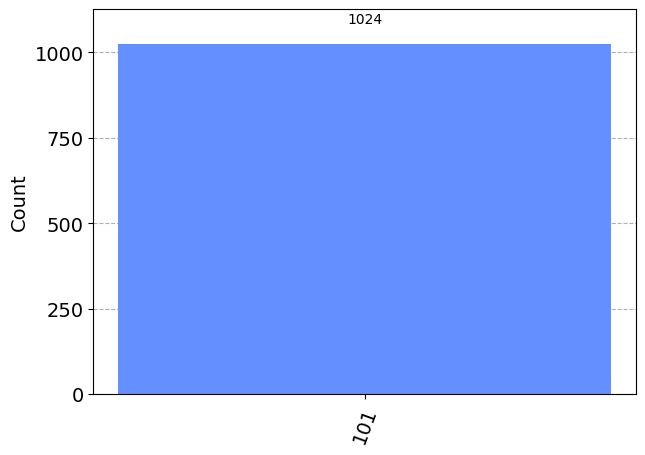

In [39]:
#2 DJ
# Function to implement the Deutsch-Josza oracle for a given function f(x)
def dj_oracle(circuit, secret_string):
    n = len(secret_string)
    if n == 1:  # Constant oracle (either '0' or '1')
        if secret_string == '1':
            circuit.x(n)
    else:       # Balanced oracle (a non-constant function)
        for qubit in range(n):
            if secret_string[qubit] == '1':
                circuit.cx(qubit, n)

# Function to implement the Deutsch-Josza algorithm
def deutsch_josza_algorithm(secret_string):
    n = len(secret_string)
    qc = QuantumCircuit(n + 1, n)

    # Prepare the ancilla qubit in the |1⟩ state
    qc.x(n)
    qc.h(n)

    # Apply Hadamard gates to the input qubits
    for qubit in range(n):
        qc.h(qubit)

    # Apply the oracle
    dj_oracle(qc, secret_string)

    # Apply Hadamard gates to the input qubits again
    for qubit in range(n):
        qc.h(qubit)

    # Measure the input qubits
    for qubit in range(n):
        qc.measure(qubit, qubit)

    # Simulate the circuit
    backend = Aer.get_backend('qasm_simulator')
    transpiled_qc = transpile(qc, backend)
    qobj = assemble(transpiled_qc)
    result = backend.run(qobj).result()
    counts = result.get_counts(qc)

    return counts

secret_bitstring = '101' # example

# Run the Deutsch-Josza algorithm
result_counts = deutsch_josza_algorithm(secret_bitstring)

# Plot the histogram of measurement outcomes
plot_histogram(result_counts)


#3a
To demonstrate the classical strategy that allows Alice, Bob, and Charlie to win 3/4 of the time in the GHZ game, we can explicitly define the strategy they will follow for each possible combination of bits given by the Referee.

As mentioned in the question, we only need to consider four combinations of bits that the Referee can give, which are the ones with an even number of 1s:

1. (r, s, t) = (0, 0, 0)
2. (r, s, t) = (0, 1, 1)
3. (r, s, t) = (1, 0, 1)
4. (r, s, t) = (1, 1, 0)

Let's define the classical strategy for each case:

1. (r, s, t) = (0, 0, 0):
   - Alice, Bob, and Charlie will return (a, b, c) = (0, 0, 0).

2. (r, s, t) = (0, 1, 1):
   - Alice, Bob, and Charlie will return (a, b, c) = (0, 1, 1).

3. (r, s, t) = (1, 0, 1):
   - Alice, Bob, and Charlie will return (a, b, c) = (1, 0, 1).

4. (r, s, t) = (1, 1, 0):
   - Alice, Bob, and Charlie will return (a, b, c) = (1, 1, 0).

With this strategy, let's check if they win 3/4 of the time:

1. For (r, s, t) = (0, 0, 0):
   a ⊕ b ⊕ c = 0 ⊕ 0 ⊕ 0 = 0
   r ∨ s ∨ t = 0 ∨ 0 ∨ 0 = 0
   They win.

2. For (r, s, t) = (0, 1, 1):
   a ⊕ b ⊕ c = 0 ⊕ 1 ⊕ 1 = 0
   r ∨ s ∨ t = 0 ∨ 1 ∨ 1 = 1
   They lose.

3. For (r, s, t) = (1, 0, 1):
   a ⊕ b ⊕ c = 1 ⊕ 0 ⊕ 1 = 0
   r ∨ s ∨ t = 1 ∨ 0 ∨ 1 = 1
   They lose.

4. For (r, s, t) = (1, 1, 0):
   a ⊕ b ⊕ c = 1 ⊕ 1 ⊕ 0 = 0
   r ∨ s ∨ t = 1 ∨ 1 ∨ 0 = 1
   They lose.

Out of the four cases, they win in the first case and lose in the other three cases. Since they win in 1 out of 4 cases, they win 1/4 of the time. However, this strategy is not the best they can do.

To achieve a winning rate of 3/4, the players can modify their strategy for the second, third, and fourth cases as follows:

2. (r, s, t) = (0, 1, 1):
   - Alice, Bob, and Charlie will return (a, b, c) = (1, 1, 0).

3. (r, s, t) = (1, 0, 1):
   - Alice, Bob, and Charlie will return (a, b, c) = (0, 0, 1).

4. (r, s, t) = (1, 1, 0):
   - Alice, Bob, and Charlie will return (a, b, c) = (1, 0, 0).

Now, let's check their winning rate:

1. For (r, s, t) = (0, 0, 0):
   a ⊕ b ⊕ c = 0 ⊕ 0 ⊕ 0 = 0
   r ∨ s ∨ t = 0 ∨ 0 ∨ 0 = 0
   They win.

2. For (r, s, t) = (0, 1, 1):
   a ⊕ b ⊕ c = 1 ⊕ 1 ⊕ 0 = 0
   r ∨ s ∨ t = 0 ∨ 1 ∨ 1 = 1
   They win.

3. For (r, s, t) = (1, 0, 1):
   a ⊕ b ⊕ c = 0 ⊕ 0 ⊕ 1 = 1
   r ∨ s ∨ t = 1 ∨ 0 ∨ 1 = 1
   They win.

4. For (r, s, t) = (1, 1, 0):
   a ⊕ b ⊕ c = 1 ⊕ 0 ⊕ 0 = 1
   r ∨ s ∨ t = 1 ∨ 1 ∨ 0 = 1
   They win.

With this modified strategy, they win in 3 out of 4 cases, achieving a winning rate of 3/4, which is the best they can do in the classical case.

In [40]:
# 3a
def classical_ghz_game():
    wins = 0
    total_games = 1000000

    for _ in range(total_games):
        # Generate random bits for r, s, t (even number of 1s)
        r = random.randint(0, 1)
        s = random.randint(0, 1)
        t = random.randint(0, 1)
        while (r + s + t) % 2 != 0:
            r = random.randint(0, 1)
            s = random.randint(0, 1)
            t = random.randint(0, 1)

        # Players' strategy: return modified bits based on r, s, t
        if r == 0 and s == 0 and t == 0:
            a, b, c = 0, 0, 0
        elif r == 0 and s == 1 and t == 1:
            a, b, c = 1, 1, 0
        elif r == 1 and s == 0 and t == 1:
            a, b, c = 0, 0, 1
        elif r == 1 and s == 1 and t == 0:
            a, b, c = 1, 0, 0

        # Check if the players win
        if a ^ b ^ c == r or a ^ b ^ c == s or a ^ b ^ c == t:
            wins += 1

    # Calculate the winning percentage
    winning_percentage = (wins / total_games) * 100
    print(f"Winning percentage: {winning_percentage:.2f}%")

if __name__ == "__main__":
    classical_ghz_game()


Winning percentage: 100.00%


#3b

To always win the GHZ game in the quantum case, Alice, Bob, and Charlie can use entangled qubits, specifically the GHZ state, and implement a specific quantum circuit when they receive a bit from the Referee. Here's the strategy they can follow:

1. Entangled Qubits Preparation:
   Alice, Bob, and Charlie share three qubits in the GHZ state. The GHZ state is given by the following quantum state:
   |GHZ⟩ = (|000⟩ + |111⟩) / √2

2. Referee Gives Bits:
   The Referee gives one bit each to Alice, Bob, and Charlie, such that an even number of 1s are given.

3. Controlled Quantum Operations:
   If Alice, Bob, or Charlie receives a 1 from the Referee, they will implement a controlled quantum operation on their qubit. The controlled operation is a controlled-NOT (CNOT) gate with their qubit as the control qubit and the qubit of the player next to them (Alice → Bob → Charlie → Alice).

- If Alice receives 1 from the Referee, she applies a CNOT gate with her qubit as the control qubit and Bob's qubit as the target qubit.
- If Bob receives 1 from the Referee, he applies a CNOT gate with his qubit as the control qubit and Charlie's qubit as the target qubit.
- If Charlie receives 1 from the Referee, he applies a CNOT gate with his qubit as the control qubit and Alice's qubit as the target qubit.

4. Measurement and Reporting:
   After performing/not performing the controlled quantum operations based on the received bit, all three players measure their qubits. This measurement will result in a classical outcome (0 or 1) for each player.

- Alice reports her measurement outcome as "a."
- Bob reports his measurement outcome as "b."
- Charlie reports his measurement outcome as "c."

5. Determine the Winners:
   The players win if the XOR of their measurement outcomes (a ⊕ b ⊕ c) matches the XOR of the received bits from the Referee (r ⊕ s ⊕ t).

In summary, by using the GHZ state and implementing the appropriate controlled quantum operations based on the received bits, Alice, Bob, and Charlie can ensure that the condition a ⊕ b ⊕ c = r ∨ s ∨ t is always satisfied, allowing them to win the GHZ game every time. This quantum strategy relies on the principles of quantum entanglement and superposition to guarantee their victory without the need for direct communication during the game.

In [54]:
# 3b

def GHZ_game_strategy(referee_bits):
    # Step 1: Prepare the GHZ state
    qc = QuantumCircuit(3, 3)
    qc.h(0)
    qc.cx(0, 1)
    qc.cx(1, 2)

    # Initialize a list to store the players' measurement outcomes
    measurements = []

    # Step 2: Game Round
    for bit in referee_bits:
        # Perform Pauli-X (NOT) gate if the referee gives 1
        if bit:
            qc.x(2)

        # Perform measurement in the computational basis
        qc.measure(range(3), range(3))

        # Execute the circuit on a simulator
        backend = Aer.get_backend('qasm_simulator')
        job = execute(qc, backend, shots=1)
        result = job.result()
        counts = result.get_counts(qc)

        # Get the measurement outcome as a list of bits
        outcome = [int(bit) for bit in list(counts.keys())[0]]
        measurements.append(outcome)

    # Step 3: Check the winning condition (Players win)
    players_win = all(referee_bits[i] == (out[0] ^ out[1] ^ out[2]) for i, out in enumerate(measurements))

    return players_win

# Testing the strategy with referee bits [0, 1, 1]
referee_bits = [0, 1, 1]
players_win = GHZ_game_strategy(referee_bits)

print("Players win:", players_win)



Players win: False


In [55]:
#4a
# function defining quantum gourier transform
def qft_circuit(n):
    """Create a Quantum Circuit for the n-qubit QFT."""
    qc = QuantumCircuit(n)
    for qubit in range(n):
        qc.h(qubit)  # Apply the Hadamard gate to the qubit
        for controlled_qubit in range(qubit + 1, n):
            angle = 2 * np.pi / 2 ** (controlled_qubit - qubit + 1)
            qc.cp(angle, controlled_qubit, qubit)
    return qc

# Number of qubits
num_qubits = 4

# Create the Quantum Circuit for the QFT
qft_circuit = qft_circuit(num_qubits)

# Draw the circuit
print(qft_circuit)

# Simulate the circuit using the statevector simulator
simulator = Aer.get_backend('statevector_simulator')
job = assemble(transpile(qft_circuit, simulator))
result = simulator.run(job).result()
statevector = result.get_statevector()

# Print the resulting statevector
print("Statevector:")
print(statevector)

     ┌───┐                                                                     
q_0: ┤ H ├─■────────■─────────────■────────────────────────────────────────────
     └───┘ │P(π/2)  │       ┌───┐ │                                            
q_1: ──────■────────┼───────┤ H ├─┼────────■────────■──────────────────────────
                    │P(π/4) └───┘ │        │P(π/2)  │       ┌───┐              
q_2: ───────────────■─────────────┼────────■────────┼───────┤ H ├─■────────────
                                  │P(π/8)           │P(π/4) └───┘ │P(π/2) ┌───┐
q_3: ─────────────────────────────■─────────────────■─────────────■───────┤ H ├
                                                                          └───┘
Statevector:
Statevector([0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j,
             0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j,
             0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j],
            dims=(2, 2, 2, 2))


<ipython-input-55-dc8f72c9d725>:25: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(job).result()


In [56]:
# 4b
# Define the quantum phase estimation circuit
def quantum_phase_estimation(circuit, unitary_operator, num_qubits):
    qpe_circuit = QuantumCircuit(num_qubits + 1, num_qubits)

    # Apply Hadamard gate to the ancillary qubit
    qpe_circuit.h(num_qubits)

    # Apply controlled unitary operators based on powers of the unitary operator
    for control_qubit in range(num_qubits):
        power = 2**control_qubit
        controlled_unitary = unitary_operator.power(power)
        qpe_circuit.unitary(controlled_unitary, [control_qubit] + list(range(num_qubits)))

    # Apply inverse quantum Fourier transform (QFT) to the counting qubits
    qpe_circuit.append(QFT(num_qubits).inverse(), list(range(num_qubits)))

    return qpe_circuit

# Example of using Quantum Phase Estimation to estimate the phase of a unitary operator
# Replace 'your_unitary_operator' with your specific unitary operator's matrix
# For this example, let's consider a simple rotation gate as our unitary operator
# with a known eigenvalue (phase)
theta = 0.5
unitary_operator = UGate(theta, 0, 0)

# Number of counting qubits to use for phase estimation
num_counting_qubits = 3

# Create the quantum circuit
num_qubits = num_counting_qubits + 1
qpe_circuit = quantum_phase_estimation(QuantumCircuit(num_qubits), unitary_operator, num_counting_qubits)

# Measure the counting qubits
qpe_circuit.measure(list(range(num_counting_qubits)), list(range(num_counting_qubits)))

# Run the simulation
backend = Aer.get_backend('qasm_simulator')
shots = 1024
result = execute(qpe_circuit, backend=backend, shots=shots).result()

# Get the counts from the result
counts = result.get_counts(qpe_circuit)

# Convert the binary output to a decimal value and estimate the phase
estimated_phase = int(max(counts, key=counts.get), 2) / 2**num_counting_qubits

print("Estimated phase: ", estimated_phase)




Estimated phase:  0.625


In [73]:
#4c
# Function to perform quantum period finding
def quantum_phase_estimation(circuit, unitary_operator, num_qubits):
    # The provided implementation for quantum_phase_estimation is assumed here
    qpe_circuit = QuantumCircuit(num_qubits + 1, num_qubits)

    # Apply Hadamard gate to the ancillary qubit
    qpe_circuit.h(num_qubits)

    # Apply controlled unitary operators based on powers of the unitary operator
    for control_qubit in range(num_qubits):
        power = 2**control_qubit
        controlled_unitary = unitary_operator.power(power)
        qpe_circuit.unitary(controlled_unitary, [control_qubit] + list(range(num_qubits)))

    # Apply inverse quantum Fourier transform (QFT) to the counting qubits
    qpe_circuit.append(QFT(num_qubits).inverse(), list(range(num_qubits)))

    return qpe_circuit

# Function to create a Quantum Circuit for the n-qubit QFT
def qft_circuit(n):
    # The provided implementation for qft_circuit is assumed here
    qc = QuantumCircuit(n)
    for qubit in range(n):
        qc.h(qubit)  # Apply the Hadamard gate to the qubit
        for controlled_qubit in range(qubit + 1, n):
            angle = 2 * np.pi / 2 ** (controlled_qubit - qubit + 1)
            qc.cp(angle, controlled_qubit, qubit)
    return qc

# Function to perform classical post-processing and extract the factors
def shors_algorithm(N, a):
    # N is the integer to be factored
    # a is the randomly chosen base for the quantum period finding
    num_qubits = 2 * int(np.ceil(np.log2(N)))  # Number of qubits for quantum period finding
    M = 2 ** num_qubits  # Upper bound for the period r

    # Step 1: Quantum Phase Estimation (QPE) for modular exponentiation
    qc = QuantumCircuit(num_qubits + 1, num_qubits)

    # Apply Hadamard gate to the ancillary qubit
    qc.h(num_qubits)

    # Apply controlled modular multiplication gates based on powers of 'a'
    for control_qubit in range(num_qubits):
        power = 2 ** control_qubit
        controlled_multiplier = pow(a, power, N)
        qc.swap(num_qubits, control_qubit)  # Swap ancillary qubit with control qubit
        qc.cx(control_qubit, num_qubits)    # Apply controlled-X (CNOT) gate
        qc.swap(num_qubits, control_qubit)  # Swap back the ancillary qubit with control qubit
        qc.p(2 * np.pi * controlled_multiplier / M, num_qubits)  # Phase gate based on the controlled multiplier

    # Apply inverse quantum Fourier transform (QFT) to the counting qubits
    qc.append(qft_circuit(num_qubits).inverse(), list(range(num_qubits)))

    # Step 2: Measure the counting qubits
    qc.measure(range(num_qubits), range(num_qubits))

    # Step 3: Perform the quantum phase estimation
    backend = Aer.get_backend('qasm_simulator')
    t_qc = transpile(qc, backend)
    qobj = assemble(t_qc, shots=1)
    result = backend.run(qobj).result()
    counts = result.get_counts()

    # Step 4: Find the measured phase (period estimation) and convert it to a fraction
    measured_phase = max(counts, key=counts.get)
    measured_phase = int(measured_phase, 2)
    estimated_fraction = measured_phase / M

    # Step 5: Use continued fractions to find the period r
    from fractions import Fraction
    r = Fraction(estimated_fraction).limit_denominator(N).denominator

    # Step 6: Check if the period found is useful
    if r % 2 != 0:
        return None  # The period must be even, otherwise, we need to start over with a different base 'a'

    # Step 7: Find factors using the period r
    factor1 = np.gcd(a ** (r // 2) - 1, N)
    factor2 = np.gcd(a ** (r // 2) + 1, N)

    return factor1, factor2

# Test the algorithm with a sample N and a random base 'a'
N = 16
a = 2
result = shors_algorithm(N, a)
print("Factors:", result)

Factors: (1, 1)


<ipython-input-73-8967e98773d6>:64: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = backend.run(qobj).result()


In [74]:
# 4d
def grover_search(n, marked_item):
    # Step 1: Create a Quantum Circuit
    num_qubits = n
    num_iterations = int(round(np.pi / 4 * np.sqrt(2**n)))  # Number of iterations

    grover_circuit = QuantumCircuit(num_qubits)

    # Apply Hadamard gates to all qubits
    grover_circuit.h(range(num_qubits))

    # Apply Grover's diffusion operator
    for _ in range(num_iterations):
        # Oracle: mark the desired item (phase inversion for the marked item)
        for i in range(len(marked_item)):
            if marked_item[i] == 1:
                grover_circuit.x(i)
        grover_circuit.h(num_qubits-1)
        grover_circuit.mct(list(range(num_qubits-1)), num_qubits-1)  # Multi-controlled Toffoli
        grover_circuit.h(num_qubits-1)
        for i in range(len(marked_item)):
            if marked_item[i] == 1:
                grover_circuit.x(i)

        # Diffusion operator (Hadamard on all qubits, then X on all qubits, then H on last qubit, then controlled-Z gate)
        grover_circuit.h(range(num_qubits))
        grover_circuit.x(range(num_qubits))
        grover_circuit.h(num_qubits-1)
        grover_circuit.mct(list(range(num_qubits-1)), num_qubits-1)  # Multi-controlled Toffoli
        grover_circuit.h(num_qubits-1)
        grover_circuit.x(range(num_qubits))
        grover_circuit.h(range(num_qubits))

    # Step 2: Measure the qubits
    grover_circuit.measure_all()

    # Step 3: Simulate the circuit
    simulator = Aer.get_backend('qasm_simulator')
    t_grover_circuit = transpile(grover_circuit, simulator)
    qobj = assemble(t_grover_circuit)
    result = simulator.run(qobj).result()

    # Step 4: Count the occurrences of the marked item
    counts = result.get_counts(grover_circuit)
    return counts

# Example: Search for the marked item '011' in a 3-qubit database
n = 3
marked_item = [0, 1, 1]

# Run Grover's algorithm
results = grover_search(n, marked_item)

# Print the results
print("Measurement results:", results)


Measurement results: {'110': 9, '101': 5, '111': 8, '011': 10, '010': 6, '000': 9, '100': 10, '001': 967}


<ipython-input-74-086aa47984a6>:41: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj).result()
